# Kmeans Clustering Technique
- Applicable primarily for continuous columns since uses Euclidean Distances
- As a first step, plot the scatter plot between the first 2 features
- Decide the number of clusters based on visuals
- Decide the number of clusters using elbow Method

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]
plt.style.use('ggplot')
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\Vaibhav\Desktop\BA\Datasets\delivery-driver.tsv', sep='\t')

In [3]:
df.head()
#Dataset on truck drivers. Distance and average speed has been reported. 

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [4]:
df.shape

(4000, 3)

In [5]:
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()
m.fit(df.iloc[:,1:])
df.iloc[:,1:] = m.transform(df.iloc[:,1:])

In [6]:
df.head(3)

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,0.243032,0.28
1,3423313212,0.161425,0.25
2,3423313724,0.213809,0.27


In [8]:
### For the purposes of this example, we store feature data from our
### dataframe `df`, in the `X` and `y` arrays. We combine this into
### a feature matrix `X` before entering it into the algorithm.
X = df[['Distance_Feature', 'Speeding_Feature']]

The chart below shows the dataset for 4,000 drivers, with the distance feature on the x-axis and speeding feature on the y-axis.

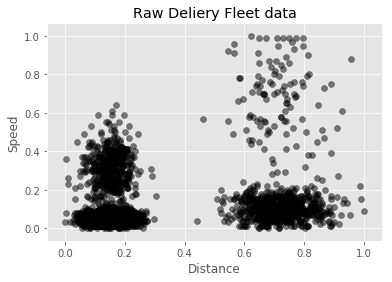

In [9]:
plt.scatter(X['Distance_Feature'], 
            X['Speeding_Feature'], 
            c='k', 
            alpha=0.5, 
            edgecolor='k')

plt.title("Raw Deliery Fleet data")
plt.xlabel('Distance')
plt.ylabel('Speed');


In [10]:
kmeans=KMeans(n_clusters=4, random_state=100)

kmeansoutput=kmeans.fit(X)

In [11]:
print(np.unique(kmeans.labels_))

# len(np.unique(kmeans.labels_))


[0 1 2 3]


In [12]:
# Centroid values
kmeans.cluster_centers_
#ave. distance travelled and aver speed

array([[0.15035823, 0.05204472],
       [0.71890399, 0.10520115],
       [0.15215608, 0.3236534 ],
       [0.70796483, 0.70288462]])

In [18]:
df = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns, index = ["Cluster1", "Cluster2", "Cluster3", "Cluster4"])
df

,Distance_Feature,Speeding_Feature
Cluster1,0.150358,0.052045
Cluster2,0.718904,0.105201
Cluster3,0.152156,0.323653
Cluster4,0.707965,0.702885


Using domain knowledge of the dataset, we can infer that Group 1 is urban drivers and Group 2 is rural drivers.

In [19]:
centers = kmeans.cluster_centers_

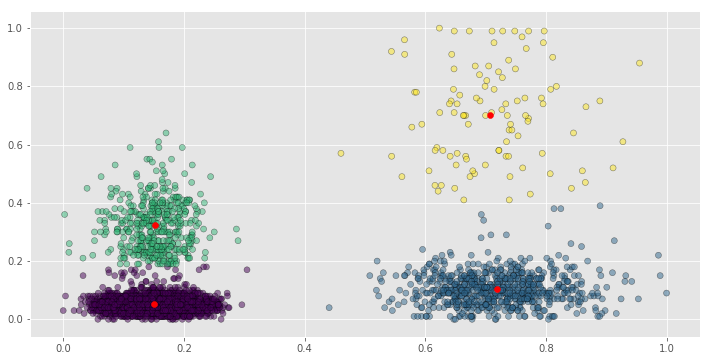

In [20]:
plt.scatter(X['Distance_Feature'], 
            X['Speeding_Feature'], 
            c=kmeansoutput.labels_.astype(float), 
            alpha=0.5, 
            edgecolor='k')

for i in range(len(np.unique(kmeans.labels_))):
    plt.scatter(centers[i][0], centers[i][1], c='r')


Text(0, 0.5, 'WCSS')

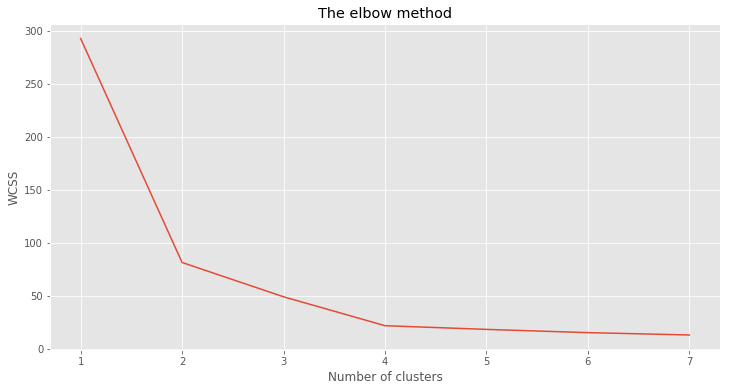

In [13]:
wcss = [] 

for i in range(1, 8):
    kmeans = KMeans(n_clusters = i,  
                    max_iter = 300, 
                    n_init = 10, 
                    random_state = 0)
  #n_init = 10 means try out 10 initial configurations and choose the best amongst them. This helps in making sure that outliers create their own cluster.

    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)
    
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 8), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares